In [1]:
#pip install geopandas
#pip install descartes

In [2]:
import geopandas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
crime = pd.read_csv('crime_output.csv', sep="\t", header=None)
crime.columns = ["state", "crime_rate"]
crime.head()

,state,crime_rate
0,AK,0.004737
1,AL,0.004442
2,AR,0.004639
3,AZ,0.003916
4,CA,0.004190


In [6]:
states = geopandas.read_file('data/usa-states-census-2014.shp')

In [7]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


<AxesSubplot:title={'center':'Crime Rate'}>

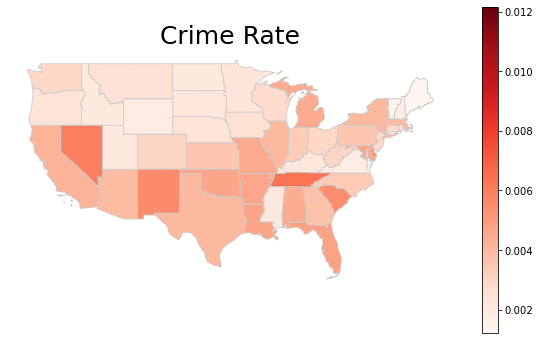

In [8]:
states = states.rename(columns={"STUSPS": "state"})
crime_state=states.merge(crime, how='inner', on='state')
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Crime Rate', fontdict={'fontsize': '25', 'fontweight' : '3'})
crime_state.plot(column='crime_rate', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [9]:
edu_crime = pd.read_csv('education_crime_output.txt', sep="\t", header=None)

In [10]:
edu_crime.columns = ["state", "crime_rate", "edu_rate"]

In [11]:
edu_crime.head(5)

,state,crime_rate,edu_rate
0,AK,0.004737,0.116879
1,AL,0.004442,0.247179
2,AR,0.004639,0.246959
3,AZ,0.003916,0.190169
4,CA,0.004190,0.231978


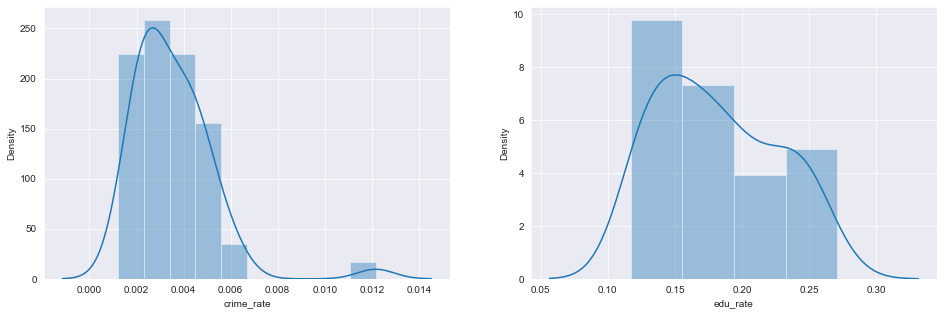

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(edu_crime['crime_rate'])
plt.subplot(1,2,2)
sns.distplot(edu_crime['edu_rate'])
plt.show()

In [13]:
print("Highest allowed",edu_crime['crime_rate'].mean() + 3*edu_crime['crime_rate'].std())
print("Lowest allowed",edu_crime['crime_rate'].mean() - 3*edu_crime['crime_rate'].std())

Highest allowed 0.008769676699524442
Lowest allowed -0.0016986922295327837


In [14]:
edu_crime[(edu_crime['crime_rate'] > 0.008769676699524442) | (edu_crime['crime_rate'] < -0.0016986922295327837)]

,state,crime_rate,edu_rate
7,DC,0.012168,0.222


In [15]:
new_edu_crime = edu_crime[(edu_crime['crime_rate'] < 0.008769676699524442) & (edu_crime['crime_rate'] > -0.0016986922295327837)]

In [16]:
sns.set_theme(color_codes=True)

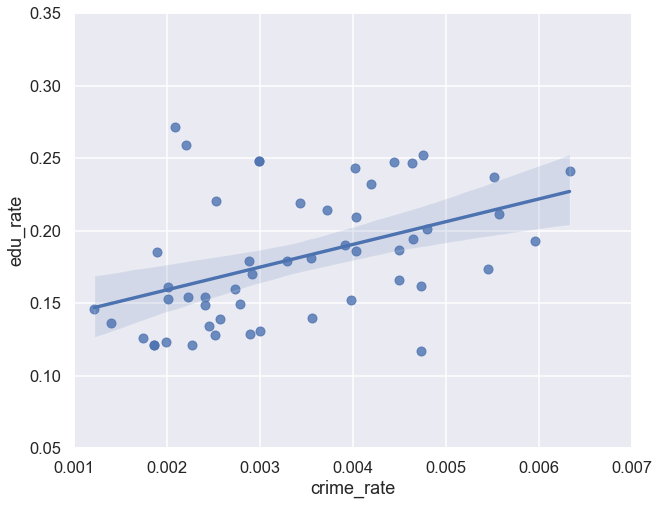

In [17]:
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1)
f, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='crime_rate', y='edu_rate', data=new_edu_crime, ax=ax);
plt.ylim(0.05, 0.35)
plt.xlim(0.001,0.007)
plt.show()

In [18]:
import scipy.stats
x=new_edu_crime['crime_rate']
y=new_edu_crime['edu_rate']

In [19]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.4869364754098361, pvalue=0.00025158456760481223)

In [20]:
unemploy_crime = pd.read_csv('unemploy_crime_output.txt', sep="\t", header=None)

In [21]:
unemploy_crime.columns = ["state", "crime_rate", "unemploy_rate"]

In [22]:
unemploy_crime.head(5)

,state,crime_rate,unemploy_rate
0,AL,0.004442,4.6
1,AK,0.004737,6.3
2,AZ,0.003916,4.0
3,AR,0.004639,4.2
4,CA,0.004190,4.9


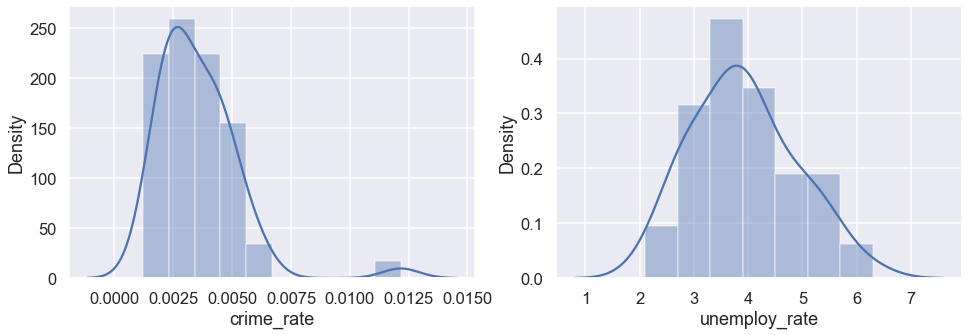

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(unemploy_crime['crime_rate'])
plt.subplot(1,2,2)
sns.distplot(unemploy_crime['unemploy_rate'])
plt.show()

In [24]:
print("Highest allowed",unemploy_crime['crime_rate'].mean() + 3*unemploy_crime['crime_rate'].std())
print("Lowest allowed",unemploy_crime['crime_rate'].mean() - 3*unemploy_crime['crime_rate'].std())

Highest allowed 0.008769676699524439
Lowest allowed -0.0016986922295327842


In [25]:
new_unemploy_crime = unemploy_crime[(unemploy_crime['crime_rate'] < 0.008769676699524442) & (unemploy_crime['crime_rate'] > -0.0016986922295327837)][(unemploy_crime['crime_rate'] < 0.008769676699524442) & (unemploy_crime['crime_rate'] > -0.0016986922295327837)]

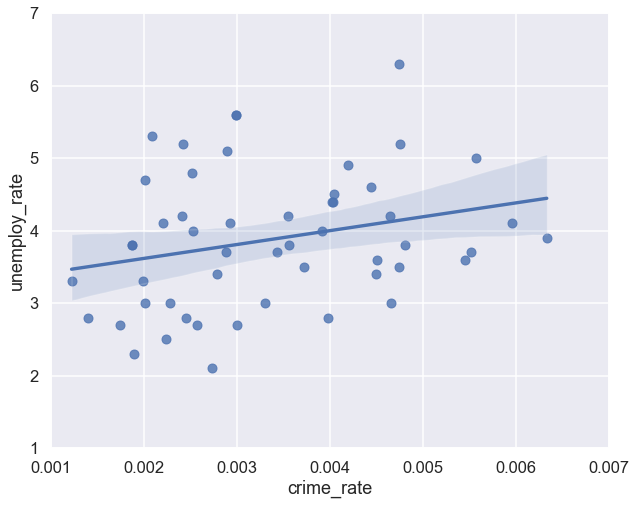

In [26]:
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1)
f, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='crime_rate', y='unemploy_rate', data=new_unemploy_crime, ax=ax);
plt.ylim(1, 7)
plt.xlim(0.001,0.007)
plt.show()

In [27]:
import scipy.stats
x=new_unemploy_crime['crime_rate']
y=new_unemploy_crime['unemploy_rate']

In [28]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.29058601275483237, pvalue=0.03663244553009995)